### Load data

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2021-09-27 16:40:40.644017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-27 16:40:40.644037: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data(path="mnist.npz")

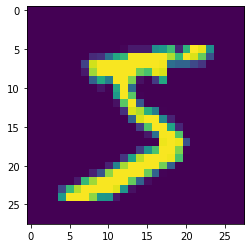

In [4]:
plt.imshow(train_images[0])

In [5]:
train_labels[0]

5

### The model

In [7]:
class CallBack(tf.keras.callbacks.Callback):
    def __init__(self, threshold=.8):
        super(CallBack, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= self.threshold:
            print(f"\nReached {self.threshold}% of accuracy, stop training...")
            self.model.stop_training = True

In [26]:
call = CallBack(threshold=.98)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=10, callbacks=[call])

2021-09-27 16:55:47.093552: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 47040000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.5379 - accuracy: 0.9093

In [28]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3254 - accuracy: 0.9504


[0.3254328668117523, 0.9503999948501587]

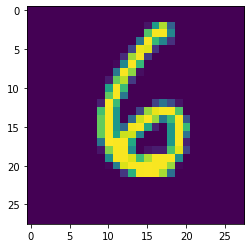

In [29]:
plt.imshow(test_images[91])

In [30]:
classes = model.predict(test_images)

In [31]:
classes[91]

array([1.0975287e-27, 0.0000000e+00, 7.3172636e-26, 0.0000000e+00,
       1.5874826e-32, 4.7883542e-19, 1.0000000e+00, 1.3125815e-37,
       3.0596960e-32, 0.0000000e+00], dtype=float32)